Импорты

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Считываем данные

In [2]:
ds_positions = pd.read_csv('ds_positions.csv', sep="\t")
ds_positions.head()

,id,user_id,user_balance_id,instrument_type,instrument_underlying,instrument_active_id,instrument_expiration,instrument_strike,instrument_dir,position_type,...,take_profit_date,stop_lose_date,spread_total_enrolled,margin_call,margin_call_enrolled,charge,charge_enrolled,volatility,custodial,custodial_enrolled
0,741538469,124963444,196865570,crypto,ETHUSD-L,831,2019-09-01 00:00:00+03,NaN,NaN,short,...,NaN,NaN,NaN,0,0,0,0,NaN,0,0
1,10388555637,105433234,90262176,digital-option,NZDUSD-OTC,80,2019-09-01 01:48:00+03,0.627786,call,long,...,NaN,NaN,NaN,0,0,0,0,0.000011,0,0
2,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.723900,call,long,...,NaN,NaN,NaN,0,0,0,0,0.000012,0,0
3,10388805684,143260369,228153647,digital-option,AUDCAD-OTC,86,2019-09-01 04:02:00+03,0.889982,put,long,...,NaN,NaN,NaN,0,0,0,0,0.000008,0,0
4,10388812382,143260369,228153647,digital-option,AUDCAD-OTC,86,2019-09-01 04:05:00+03,0.890097,put,long,...,NaN,NaN,NaN,0,0,0,0,0.000008,0,0


In [3]:
ds_events = pd.read_csv('ds_events.csv', sep="\t")
ds_events.head()

,name,parameters,platform_id,user_id,device_id,duration,category,time
0,get-first-candles,"{""active-id"":""8""}",9,154623745,36c924daddc4757984d9ea3597e3e6a6,742.0,system,2019-09-03 06:10:17
1,get-first-candles,"{""active-id"":""101""}",9,154623745,36c924daddc4757984d9ea3597e3e6a6,317.0,system,2019-10-04 15:12:41
2,traderoom_deal-put,"{""asset_id"":""101"",""balance_type"":""4"",""expirati...",8,152286034,0000000003069119-0000000000000008,NaN,button_pressed,2019-09-11 02:21:12
3,get-underlying-list,"{""instrument-type"":""digital-option"",""status"":""...",9,154623745,36c924daddc4757984d9ea3597e3e6a6,415.0,system,2019-10-03 03:38:44
4,binary-options_open-time,"{""country_id"":194,""id"":5702514011}",8,152286034,0000000003069119-0000000000000008,330.0,system,2019-09-04 06:58:52


In [4]:
ds_deposits = pd.read_csv('ds_deposits.csv', sep="\t")
ds_deposits.head()

,op_id,user_id,amount,currency,enrolled_amount,enrolled_currency,payment_method_id,type,created,updated,user_balance_id,client_platform_id
0,18137772533,108248584,63270000,USD,63270000,USD,7,deposit,2019-09-03 10:52:39.000000,2019-09-03 10:52:39.000000,95014947,17
1,18141899562,82650757,20000000,USD,20000000,USD,9,deposit,2019-09-03 13:45:30.000000,2019-09-03 13:45:30.000000,50189171,15
2,18195563304,142368925,15000000,USD,15000000,USD,392,deposit,2019-09-05 07:27:34.000000,2019-09-05 07:27:34.000000,226624664,15
3,18198759863,108248584,64300000,USD,64300000,USD,7,deposit,2019-09-05 10:27:12.000000,2019-09-05 10:27:12.000000,95014947,17
4,18215409102,87392956,15000000,USD,15000000,USD,55,deposit,2019-09-05 20:06:25.000000,2019-09-05 20:06:25.000000,58109972,2


In [5]:
ds_appsflyer = pd.read_csv('ds_appsflyer.csv', sep="\t")
ds_appsflyer.head()

,user_id,id,click_time,install_time,client_platform_id,country_id,device,os_version,apps_flyer_device_id,aff_id,media_source,created_at
0,155968324,110099894,2019-10-17 09:58:28,2019-10-17 09:58:28,12,-1.0,"iPhone12,1",13.1.2,1571302786477-972824,165,Organic,2019-10-17 09:58:59
1,142098889,110098860,2019-10-17 09:44:20,2019-10-17 09:44:20,3,78.0,"iPad11,1",13.1.2,1571312618916-139305,160,Organic,2019-10-17 09:44:51
2,156038389,110097901,2019-10-17 09:30:08,2019-10-17 09:30:41,2,175.0,HUAWEI-LYA-L29,9,1571304639158-3775642868910920374,161,None,2019-10-17 09:31:11
3,157069588,110097636,2019-10-17 09:23:24,2019-10-17 09:26:52,2,180.0,samsung-SM-A260F,8.1.0,1571304405712-6154973233583185520,38737,SOCIARO,2019-10-17 09:27:23
4,157069537,110097589,2019-10-17 09:20:16,2019-10-17 09:26:12,2,200.0,HUAWEI-SNE-LX1,9,1571304369154-2060259551930846922,53883,liftoff_int,2019-10-17 09:26:43


Просмотр пропущенных значений

<AxesSubplot:>

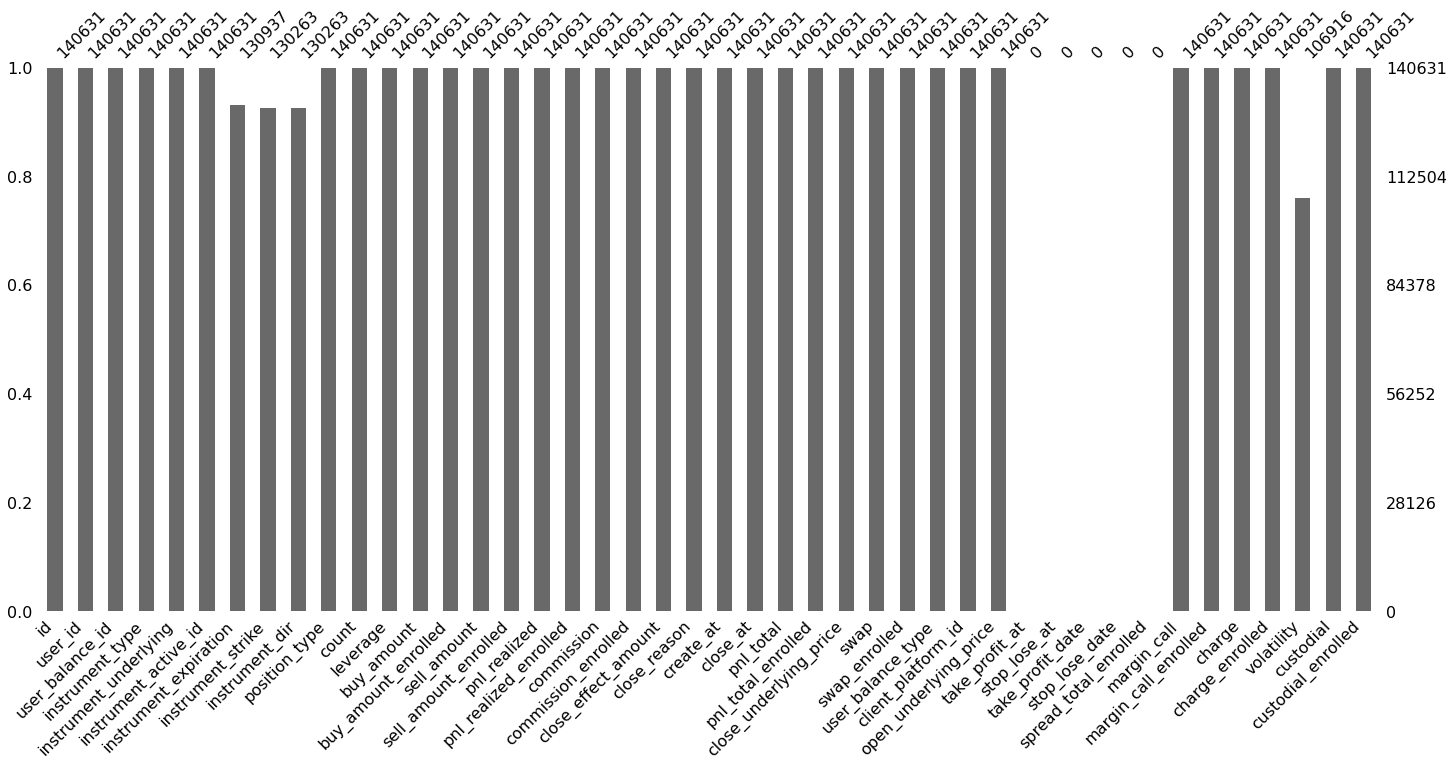

In [6]:
import missingno as msn
msn.bar(ds_positions)

<AxesSubplot:>

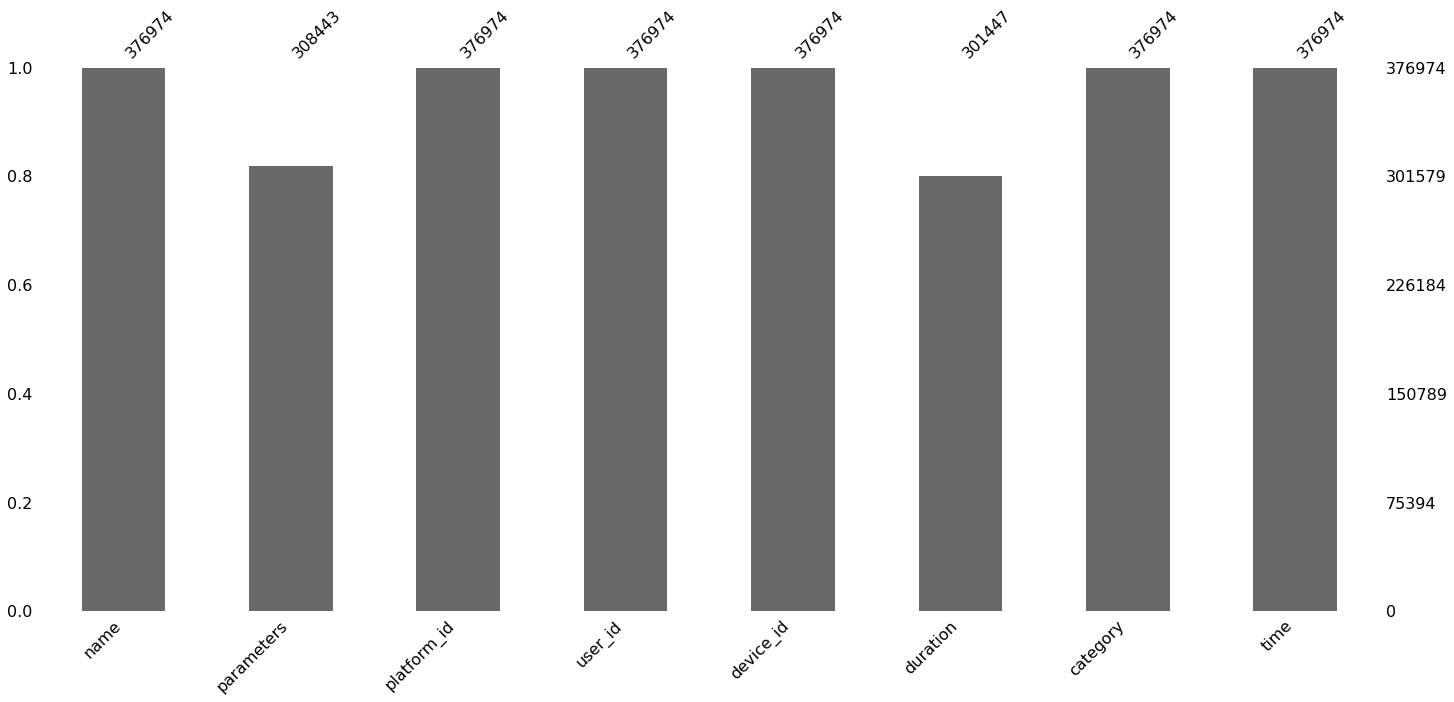

In [7]:
msn.bar(ds_events)

<AxesSubplot:>

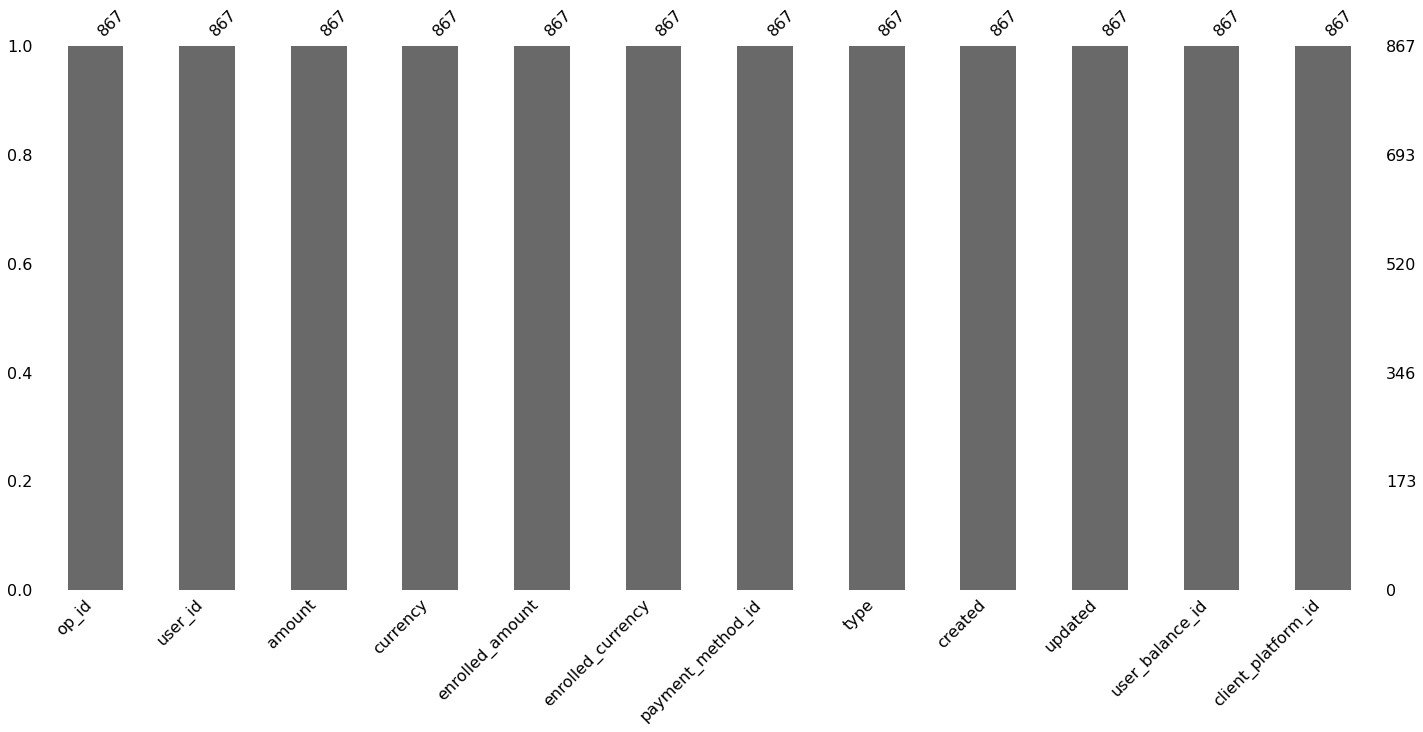

In [8]:
msn.bar(ds_deposits)

<AxesSubplot:>

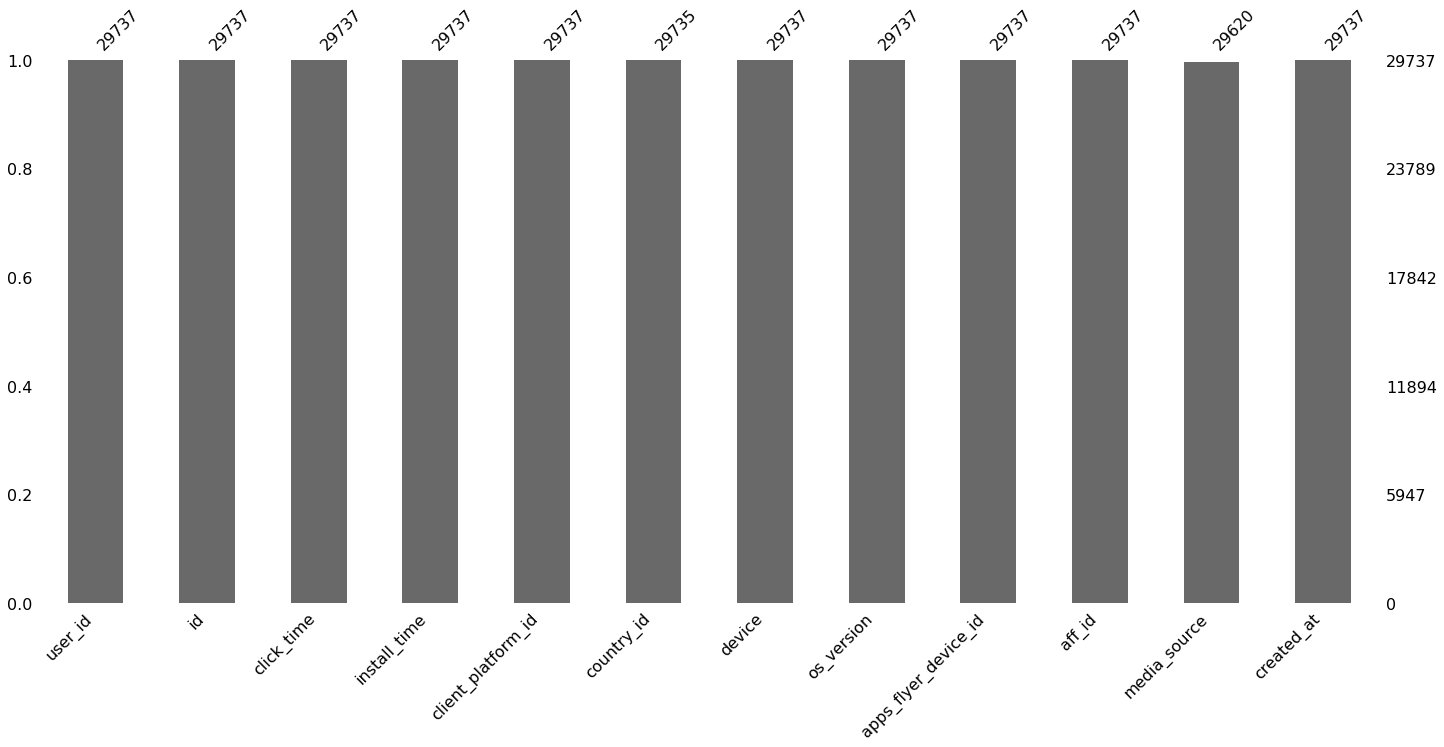

In [9]:
msn.bar(ds_appsflyer)

<AxesSubplot:>

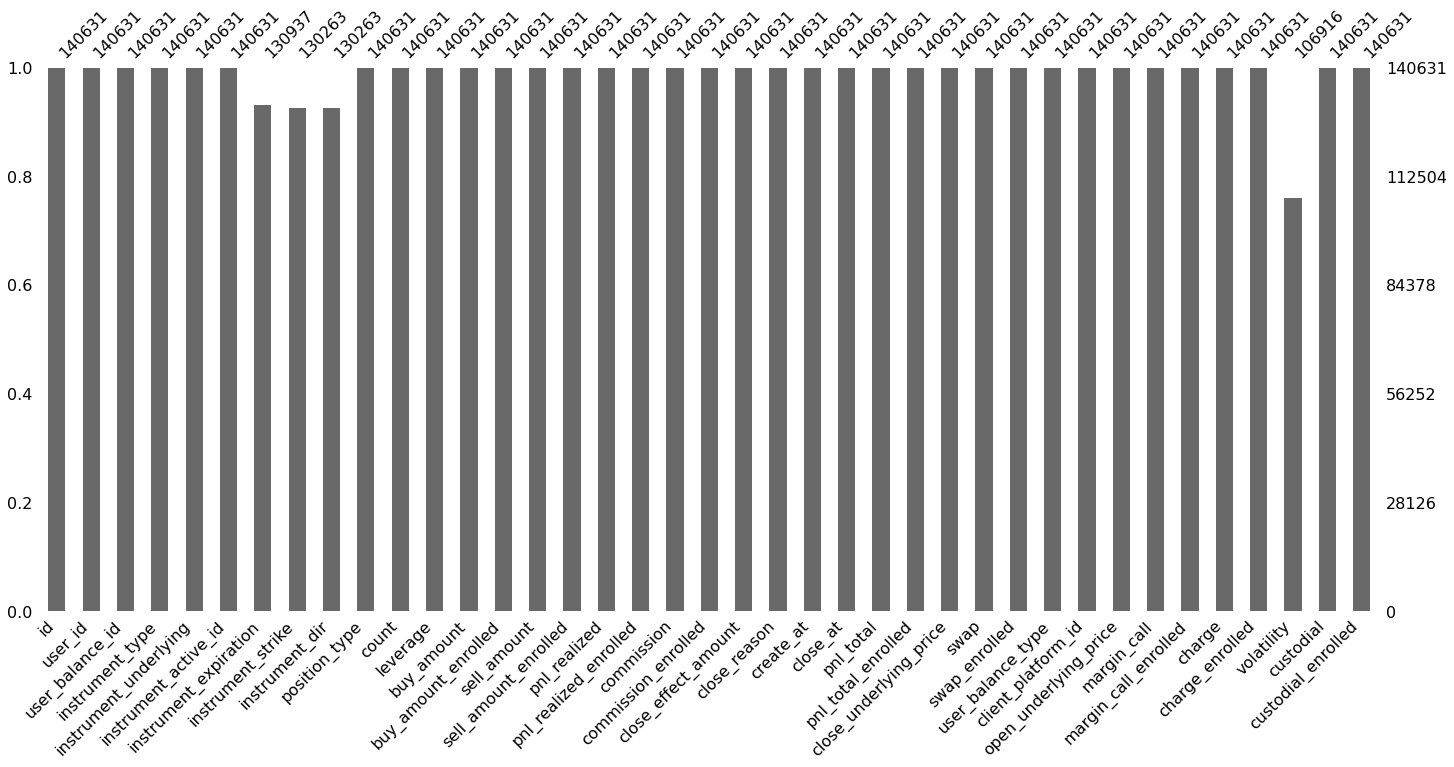

In [10]:
ds_positions.drop(['take_profit_at', 'stop_lose_at', 'take_profit_date', 'stop_lose_date', 'spread_total_enrolled'], axis=1, inplace=True)
msn.bar(ds_positions)

**Просмотрим каждый датафрейм по отдельности для раведочного анализа**

1. ds_positions

In [11]:
ds_positions.columns

Index(['id', 'user_id', 'user_balance_id', 'instrument_type',
       'instrument_underlying', 'instrument_active_id',
       'instrument_expiration', 'instrument_strike', 'instrument_dir',
       'position_type', 'count', 'leverage', 'buy_amount',
       'buy_amount_enrolled', 'sell_amount', 'sell_amount_enrolled',
       'pnl_realized', 'pnl_realized_enrolled', 'commission',
       'commission_enrolled', 'close_effect_amount', 'close_reason',
       'create_at', 'close_at', 'pnl_total', 'pnl_total_enrolled',
       'close_underlying_price', 'swap', 'swap_enrolled', 'user_balance_type',
       'client_platform_id', 'open_underlying_price', 'margin_call',
       'margin_call_enrolled', 'charge', 'charge_enrolled', 'volatility',
       'custodial', 'custodial_enrolled'],
      dtype='object')

In [12]:
ds_positions.head()

,id,user_id,user_balance_id,instrument_type,instrument_underlying,instrument_active_id,instrument_expiration,instrument_strike,instrument_dir,position_type,...,user_balance_type,client_platform_id,open_underlying_price,margin_call,margin_call_enrolled,charge,charge_enrolled,volatility,custodial,custodial_enrolled
0,741538469,124963444,196865570,crypto,ETHUSD-L,831,2019-09-01 00:00:00+03,NaN,NaN,short,...,4,8,167204000,0,0,0,0,NaN,0,0
1,10388555637,105433234,90262176,digital-option,NZDUSD-OTC,80,2019-09-01 01:48:00+03,0.627786,call,long,...,1,8,627786,0,0,0,0,0.000011,0,0
2,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.723900,call,long,...,1,2,105723900,0,0,0,0,0.000012,0,0
3,10388805684,143260369,228153647,digital-option,AUDCAD-OTC,86,2019-09-01 04:02:00+03,0.889982,put,long,...,1,2,889982,0,0,0,0,0.000008,0,0
4,10388812382,143260369,228153647,digital-option,AUDCAD-OTC,86,2019-09-01 04:05:00+03,0.890097,put,long,...,1,2,890097,0,0,0,0,0.000008,0,0


<AxesSubplot:>

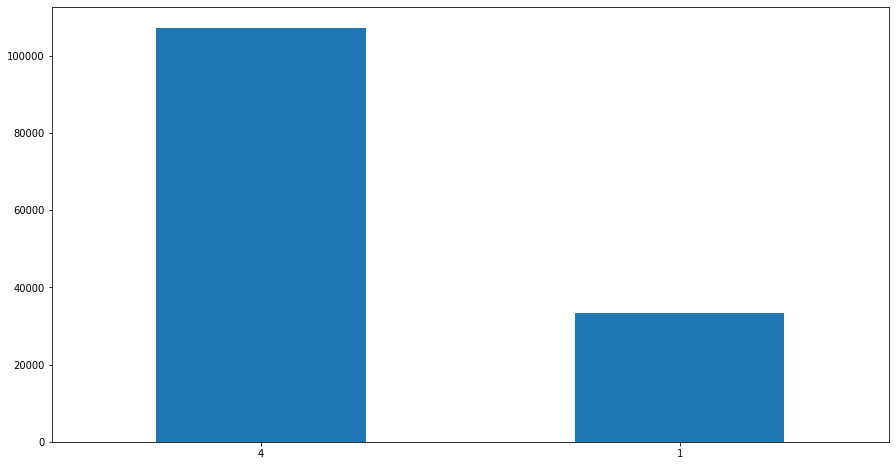

In [13]:
plt.figure(figsize=(15,8))
ds_positions['user_balance_type'].value_counts(sort=True).plot.bar(rot=0)

In [14]:
tmp1 = ds_positions.groupby(['user_balance_type', 'instrument_dir']).size().reset_index()
tmp1.head(10)

,user_balance_type,instrument_dir,0
0,1,call,14957
1,1,put,17141
2,4,call,60323
3,4,put,37842


In [15]:
tmp1 = ds_positions.groupby(['user_balance_type', 'instrument_type']).size().reset_index()
tmp1.head(10)

,user_balance_type,instrument_type,0
0,1,cfd,261
1,1,crypto,88
2,1,digital-option,32089
3,1,forex,878
4,1,fx-option,9
5,4,cfd,2442
6,4,crypto,1091
7,4,digital-option,97926
8,4,forex,5608
9,4,fx-option,239


Здесь можно сразу сказать, что если instrument_type == crypto, тогда по простой модели априорной вер-сти можно сказать, что у user демо-счет с вероятностью 90%. Аналогично с fx-option. Но естественно связь может оказаться намного сложнее

In [16]:
tmp1 = ds_positions.groupby(['user_balance_type', 'position_type']).size().reset_index()
tmp1.head(10)

,user_balance_type,position_type,0
0,1,long,32752
1,1,short,573
2,4,long,103256
3,4,short,4050


In [17]:
tmp1 = ds_positions.groupby(['user_balance_type', 'close_reason']).size().reset_index()
tmp1.head(10)

,user_balance_type,close_reason,0
0,1,default,14455
1,1,expired,18599
2,1,margin_erase,73
3,1,stop_lose,114
4,1,take_profit,84
5,4,default,22639
6,4,expired,81040
7,4,margin_erase,1207
8,4,stop_lose,427
9,4,take_profit,1993


(array([59708.,  3165.,  2754.,  3831.,  1446.,   491.,   392.,  4208.,
          213.,   139.,    93.,   381.,    87.,   184.,   951.,   570.,
           75.,   110.,   371.,   143.,    88.,   139.,   213.,   171.,
          108.,    80.,   161.,   104.,   126.,   210.,   173.,   260.,
          506.,   843.,   126.,   453.,  7008., 16929.,   617.,  1501.]),
 array([0.       , 0.0249973, 0.0499946, 0.0749919, 0.0999892, 0.1249865,
        0.1499838, 0.1749811, 0.1999784, 0.2249757, 0.249973 , 0.2749703,
        0.2999676, 0.3249649, 0.3499622, 0.3749595, 0.3999568, 0.4249541,
        0.4499514, 0.4749487, 0.499946 , 0.5249433, 0.5499406, 0.5749379,
        0.5999352, 0.6249325, 0.6499298, 0.6749271, 0.6999244, 0.7249217,
        0.749919 , 0.7749163, 0.7999136, 0.8249109, 0.8499082, 0.8749055,
        0.8999028, 0.9249001, 0.9498974, 0.9748947, 0.999892 ]),
 <BarContainer object of 40 artists>)

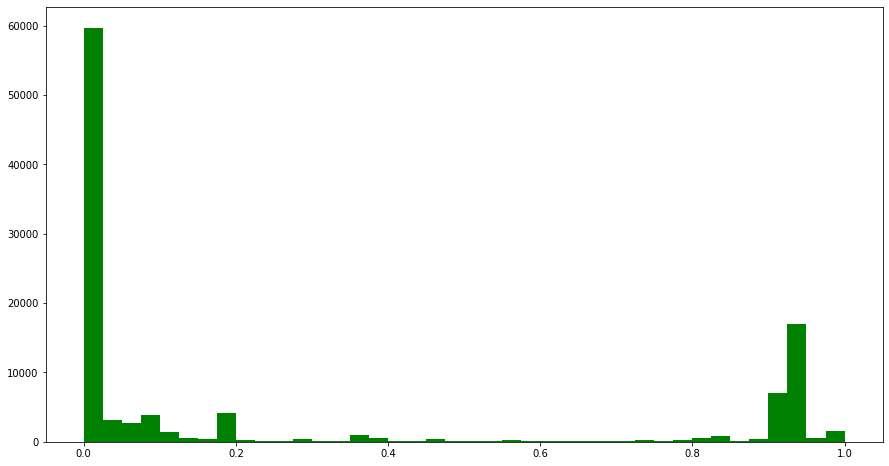

In [18]:
plt.figure(figsize=(15,8))
plt.hist(ds_positions[(ds_positions['count']>=0) & (ds_positions['count']<1)]['count'], color="green", bins=40)
#ds_positions['count'].mean()-3*ds_positions['count'].std()

4    45870
1    30951
Name: user_balance_type, dtype: int64

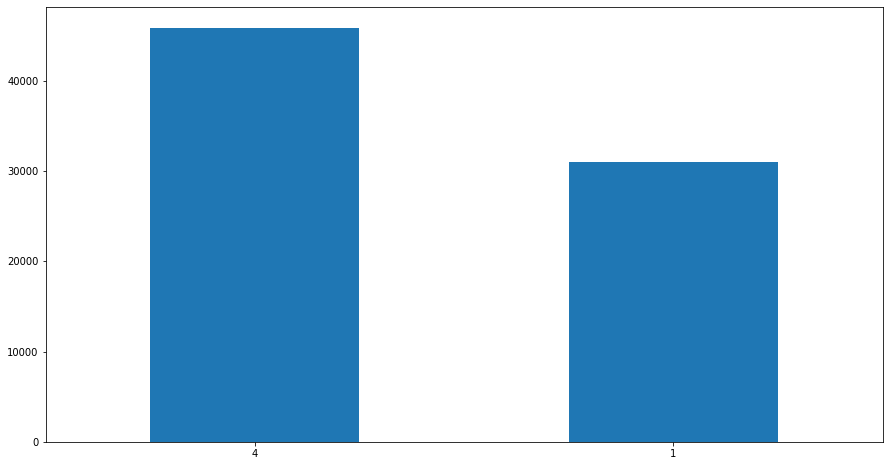

In [19]:
tmp_df = ds_positions[(ds_positions['count']>=0) & (ds_positions['count']<0.3)]
plt.figure(figsize=(15,8))
tmp_df['user_balance_type'].value_counts(sort=True).plot.bar(rot=0)
tmp_df['user_balance_type'].value_counts(sort=True)

<AxesSubplot:>

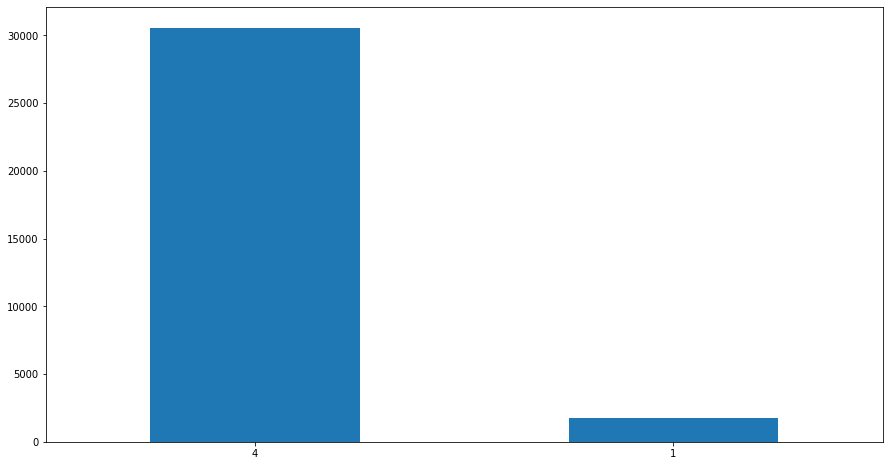

In [20]:
tmp_df = ds_positions[(ds_positions['count']>=0.3) & (ds_positions['count']<1)]
plt.figure(figsize=(15,8))
tmp_df['user_balance_type'].value_counts(sort=True).plot.bar(rot=0)

Построив гистограмму по колонке count, можно видеть два холма в 0 и 0.9.
Поделив наши данные на две части с порогом 0.3, можно увидеть, что при(ds_positions['count']>=0.3) & (ds_positions['count']<1) кол-во объектов попадающий в класс 1, нашей целевой переменной user_balance_type очень незначительна. Поэтому имеет смысл сократить наш датасет таким условием: (ds_positions['count']>=0) & (ds_positions['count']<0.3)

In [21]:
new_ds_positions = ds_positions[(ds_positions['count']>=0) & (ds_positions['count']<0.3)]
new_ds_positions.head()

,id,user_id,user_balance_id,instrument_type,instrument_underlying,instrument_active_id,instrument_expiration,instrument_strike,instrument_dir,position_type,...,user_balance_type,client_platform_id,open_underlying_price,margin_call,margin_call_enrolled,charge,charge_enrolled,volatility,custodial,custodial_enrolled
0,741538469,124963444,196865570,crypto,ETHUSD-L,831,2019-09-01 00:00:00+03,NaN,NaN,short,...,4,8,167204000,0,0,0,0,NaN,0,0
1,10388555637,105433234,90262176,digital-option,NZDUSD-OTC,80,2019-09-01 01:48:00+03,0.627786,call,long,...,1,8,627786,0,0,0,0,0.000011,0,0
2,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.723900,call,long,...,1,2,105723900,0,0,0,0,0.000012,0,0
3,10388805684,143260369,228153647,digital-option,AUDCAD-OTC,86,2019-09-01 04:02:00+03,0.889982,put,long,...,1,2,889982,0,0,0,0,0.000008,0,0
4,10388812382,143260369,228153647,digital-option,AUDCAD-OTC,86,2019-09-01 04:05:00+03,0.890097,put,long,...,1,2,890097,0,0,0,0,0.000008,0,0


In [22]:
new_ds_positions['volatility'].describe()

count    5.360700e+04
mean     1.199990e-05
std      1.029194e-05
min      2.441995e-07
25%      7.660329e-06
50%      1.028002e-05
75%      1.321188e-05
max      4.733133e-04
Name: volatility, dtype: float64

(array([6.7400e+02, 3.7530e+03, 9.1230e+03, 1.2709e+04, 1.1801e+04,
        6.5360e+03, 2.8130e+03, 1.6270e+03, 1.1160e+03, 7.4900e+02,
        6.1900e+02, 3.8700e+02, 2.6200e+02, 2.5800e+02, 1.9600e+02,
        1.8300e+02, 1.2800e+02, 9.3000e+01, 5.3000e+01, 5.4000e+01,
        6.4000e+01, 5.0000e+01, 6.3000e+01, 2.8000e+01, 2.9000e+01,
        1.9000e+01, 2.3000e+01, 1.1000e+01, 1.3000e+01, 1.3000e+01,
        7.0000e+00, 1.1000e+01, 7.0000e+00, 1.0000e+01, 6.0000e+00,
        1.5000e+01, 4.0000e+00, 5.0000e+00, 6.0000e+00, 1.0000e+00]),
 array([2.44199457e-07, 2.72590449e-06, 5.20760952e-06, 7.68931456e-06,
        1.01710196e-05, 1.26527246e-05, 1.51344297e-05, 1.76161347e-05,
        2.00978397e-05, 2.25795448e-05, 2.50612498e-05, 2.75429548e-05,
        3.00246599e-05, 3.25063649e-05, 3.49880699e-05, 3.74697750e-05,
        3.99514800e-05, 4.24331850e-05, 4.49148901e-05, 4.73965951e-05,
        4.98783001e-05, 5.23600052e-05, 5.48417102e-05, 5.73234152e-05,
        5.98051203e-05

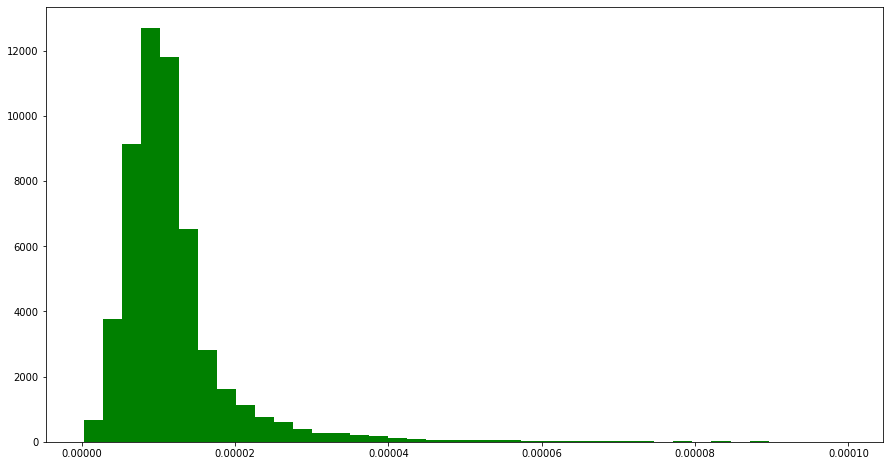

In [23]:
plt.figure(figsize=(15,8))
plt.hist(new_ds_positions[new_ds_positions['volatility'] < 0.0001]['volatility'], color="green", bins=40)

2. ds_events

In [24]:
ds_events.columns

Index(['name', 'parameters', 'platform_id', 'user_id', 'device_id', 'duration',
       'category', 'time'],
      dtype='object')

In [25]:
ds_events.head()

,name,parameters,platform_id,user_id,device_id,duration,category,time
0,get-first-candles,"{""active-id"":""8""}",9,154623745,36c924daddc4757984d9ea3597e3e6a6,742.0,system,2019-09-03 06:10:17
1,get-first-candles,"{""active-id"":""101""}",9,154623745,36c924daddc4757984d9ea3597e3e6a6,317.0,system,2019-10-04 15:12:41
2,traderoom_deal-put,"{""asset_id"":""101"",""balance_type"":""4"",""expirati...",8,152286034,0000000003069119-0000000000000008,NaN,button_pressed,2019-09-11 02:21:12
3,get-underlying-list,"{""instrument-type"":""digital-option"",""status"":""...",9,154623745,36c924daddc4757984d9ea3597e3e6a6,415.0,system,2019-10-03 03:38:44
4,binary-options_open-time,"{""country_id"":194,""id"":5702514011}",8,152286034,0000000003069119-0000000000000008,330.0,system,2019-09-04 06:58:52


In [26]:
ds_events['name'].unique()

array(['get-first-candles', 'traderoom_deal-put', 'get-underlying-list',
       'binary-options_open-time', 'get-strike-list',
       'traderoom_deal-call', 'app_launch', 'order-created',
       'place-order-temp-response', 'open-position', 'get-instruments',
       'position-created'], dtype=object)

<AxesSubplot:>

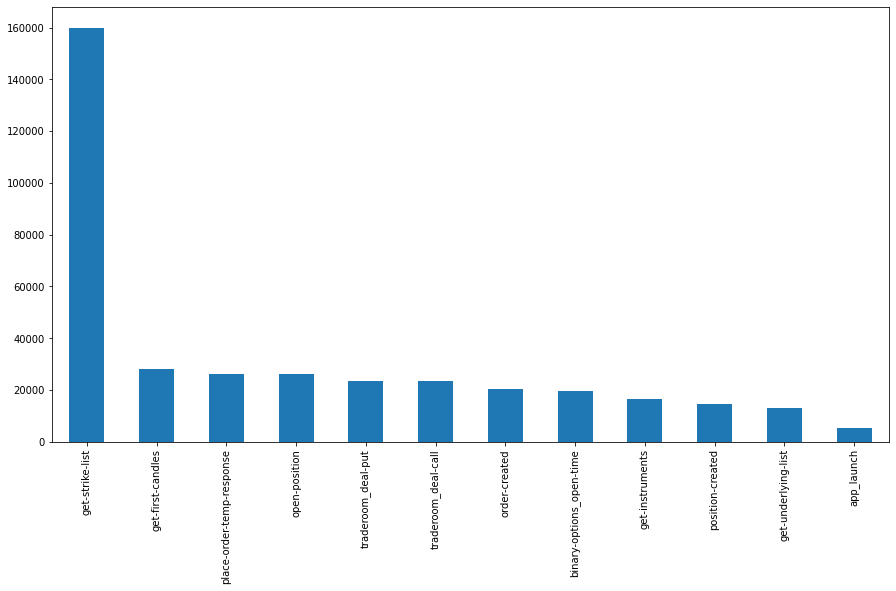

In [27]:
plt.figure(figsize=(15,8))
ds_events['name'].value_counts(sort=True).plot.bar()

<AxesSubplot:>

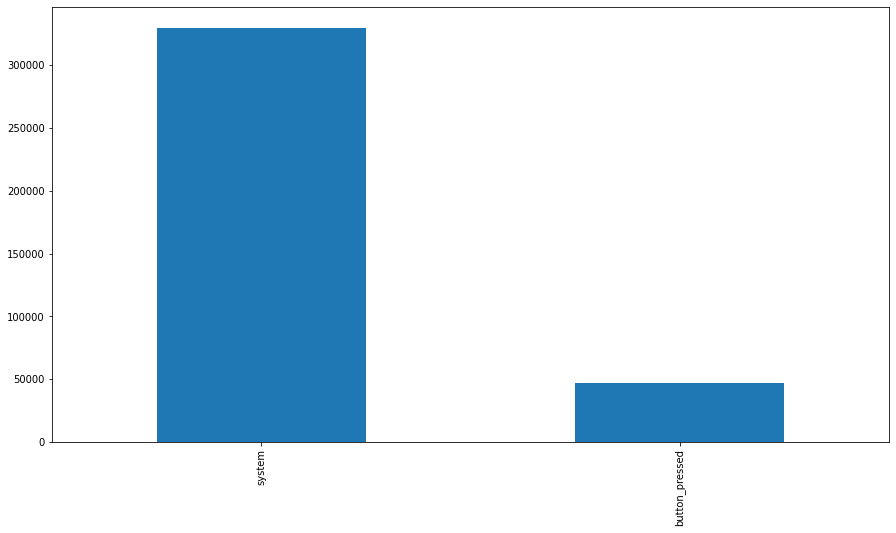

In [28]:
plt.figure(figsize=(15,8))
ds_events['category'].value_counts(sort=True).plot.bar()

23329186.0

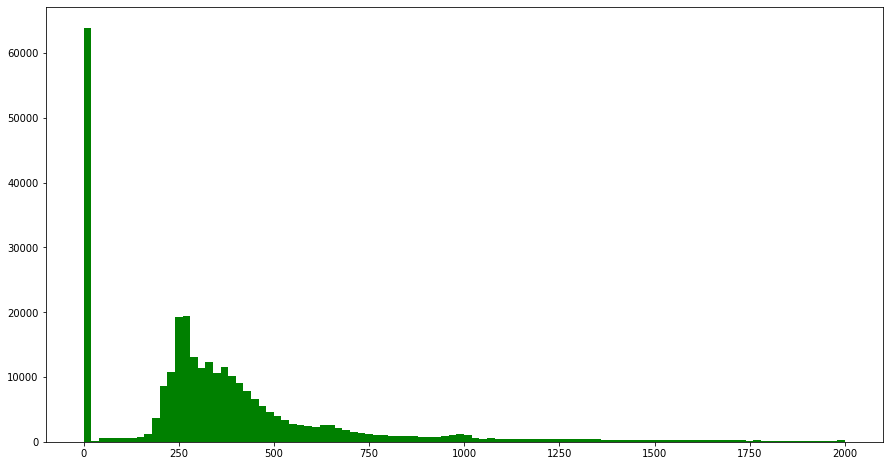

In [29]:
plt.figure(figsize=(15,8))
plt.hist(ds_events[ds_events['duration'].notnull() & (ds_events['duration'] < 2000)]['duration'], color="green", bins=100)
ds_events['duration'].max()

In [30]:
ds_events.drop(['parameters'], axis=1, inplace=True)

3. ds_deposits

In [31]:
ds_deposits.columns

Index(['op_id', 'user_id', 'amount', 'currency', 'enrolled_amount',
       'enrolled_currency', 'payment_method_id', 'type', 'created', 'updated',
       'user_balance_id', 'client_platform_id'],
      dtype='object')

In [32]:
ds_deposits.head()

,op_id,user_id,amount,currency,enrolled_amount,enrolled_currency,payment_method_id,type,created,updated,user_balance_id,client_platform_id
0,18137772533,108248584,63270000,USD,63270000,USD,7,deposit,2019-09-03 10:52:39.000000,2019-09-03 10:52:39.000000,95014947,17
1,18141899562,82650757,20000000,USD,20000000,USD,9,deposit,2019-09-03 13:45:30.000000,2019-09-03 13:45:30.000000,50189171,15
2,18195563304,142368925,15000000,USD,15000000,USD,392,deposit,2019-09-05 07:27:34.000000,2019-09-05 07:27:34.000000,226624664,15
3,18198759863,108248584,64300000,USD,64300000,USD,7,deposit,2019-09-05 10:27:12.000000,2019-09-05 10:27:12.000000,95014947,17
4,18215409102,87392956,15000000,USD,15000000,USD,55,deposit,2019-09-05 20:06:25.000000,2019-09-05 20:06:25.000000,58109972,2


1000000000

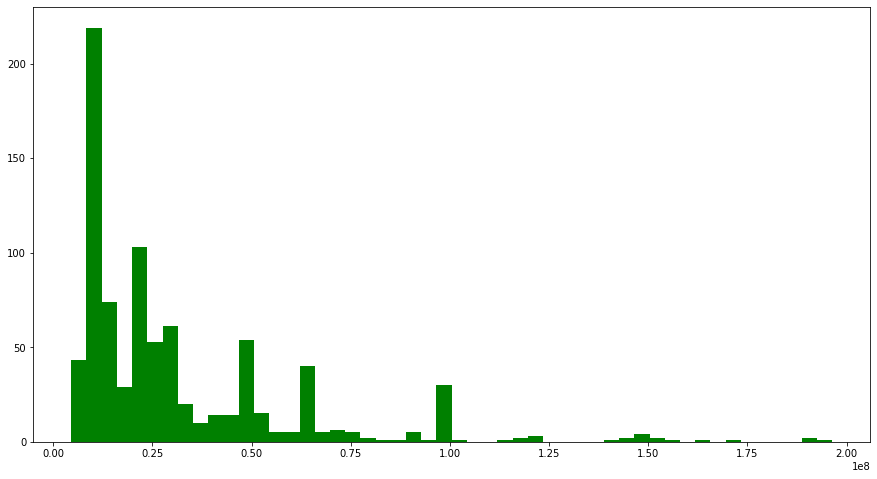

In [33]:
plt.figure(figsize=(15,8))
plt.hist(ds_deposits[ds_deposits['enrolled_amount'] < 200000000]['enrolled_amount'], color="green", bins=50)
ds_deposits['enrolled_amount'].max()

<AxesSubplot:>

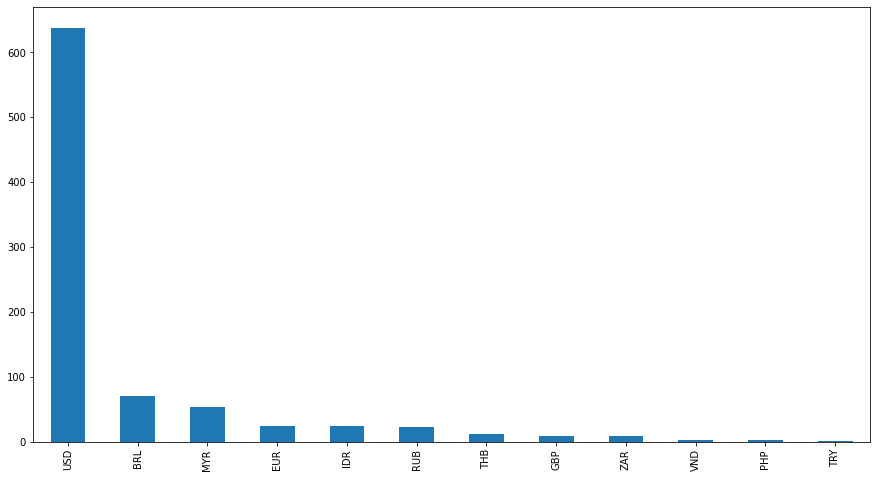

In [34]:
plt.figure(figsize=(15,8))
ds_deposits['currency'].value_counts(sort=True).plot.bar()

<AxesSubplot:>

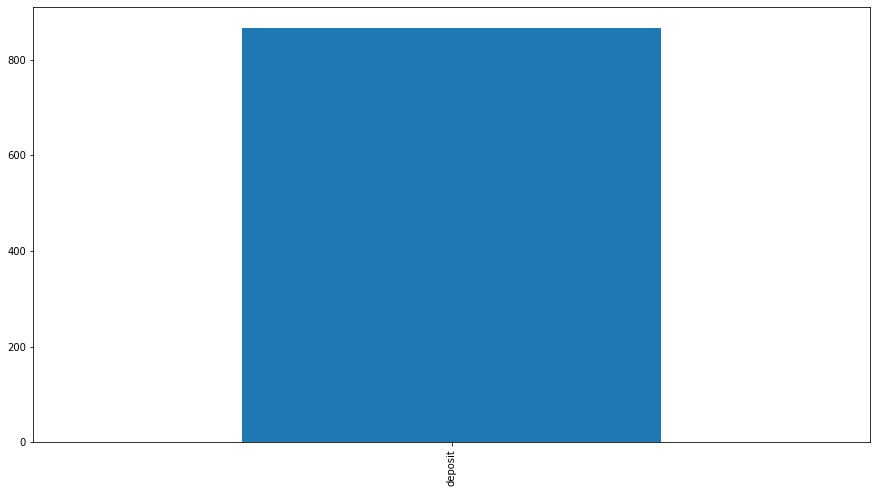

In [35]:
plt.figure(figsize=(15,8))
ds_deposits['type'].value_counts(sort=True).plot.bar()

In [36]:
ds_deposits.drop(['type'], axis=1, inplace=True)

4. ds_appsflyer

In [37]:
ds_appsflyer.columns

Index(['user_id', 'id', 'click_time', 'install_time', 'client_platform_id',
       'country_id', 'device', 'os_version', 'apps_flyer_device_id', 'aff_id',
       'media_source', 'created_at'],
      dtype='object')

In [38]:
ds_appsflyer.head()

,user_id,id,click_time,install_time,client_platform_id,country_id,device,os_version,apps_flyer_device_id,aff_id,media_source,created_at
0,155968324,110099894,2019-10-17 09:58:28,2019-10-17 09:58:28,12,-1.0,"iPhone12,1",13.1.2,1571302786477-972824,165,Organic,2019-10-17 09:58:59
1,142098889,110098860,2019-10-17 09:44:20,2019-10-17 09:44:20,3,78.0,"iPad11,1",13.1.2,1571312618916-139305,160,Organic,2019-10-17 09:44:51
2,156038389,110097901,2019-10-17 09:30:08,2019-10-17 09:30:41,2,175.0,HUAWEI-LYA-L29,9,1571304639158-3775642868910920374,161,None,2019-10-17 09:31:11
3,157069588,110097636,2019-10-17 09:23:24,2019-10-17 09:26:52,2,180.0,samsung-SM-A260F,8.1.0,1571304405712-6154973233583185520,38737,SOCIARO,2019-10-17 09:27:23
4,157069537,110097589,2019-10-17 09:20:16,2019-10-17 09:26:12,2,200.0,HUAWEI-SNE-LX1,9,1571304369154-2060259551930846922,53883,liftoff_int,2019-10-17 09:26:43


In [39]:
#plt.figure(figsize=(20,8))
ds_appsflyer['country_id'].value_counts(sort=True).reset_index().head(10)#.plot.bar()

,index,country_id
0,225.0,6990
1,30.0,4513
2,194.0,1762
3,94.0,1689
4,151.0,1232
5,180.0,1195
6,46.0,838
7,119.0,832
8,157.0,808
9,146.0,589


In [40]:
#plt.figure(figsize=(20,8))
ds_appsflyer['device'].value_counts(sort=True).reset_index().head(10)#.plot.bar()

,index,device
0,iPhone 7,473
1,iPhone 6s,421
2,iPhone 6,414
3,iPhone 7 Plus,374
4,xiaomi-Redmi Note 4,302
5,xiaomi-Redmi Note 5,279
6,iPhone X,278
7,xiaomi-Redmi Note 7,262
8,xiaomi-Redmi Note 5 Pro,249
9,samsung-SM-G610M,249


In [41]:
#plt.figure(figsize=(20,8))
ds_appsflyer['aff_id'].value_counts(sort=True).reset_index().head(10)#.plot.bar()

,index,aff_id
0,161,7745
1,129179,3496
2,53883,1308
3,38717,1273
4,160,1000
5,53792,999
6,97728,928
7,38737,833
8,53853,787
9,53831,568


In [42]:
#plt.figure(figsize=(20,8))
ds_appsflyer['media_source'].value_counts(sort=True).reset_index().head(10)#.plot.bar()

,index,media_source
0,Organic,7381
1,Facebook Ads,7357
2,SOCIARO,2066
3,liftoff_int,1600
4,ironsource_int,1587
5,unityads_int,1152
6,applovin_int,1005
7,mobvista_int,977
8,iqoption_int,911
9,None,680


Объединение датафреймов

In [70]:
common_cols = new_ds_positions.columns.intersection(ds_deposits.columns)
common_cols

# new_ds_positions
# ds_events
# ds_deposits
# ds_appsflyer

Index(['user_id', 'user_balance_id', 'client_platform_id'], dtype='object')

In [71]:
new_ds_positions.head()

,id,user_id,user_balance_id,instrument_type,instrument_underlying,instrument_active_id,instrument_expiration,instrument_strike,instrument_dir,position_type,...,user_balance_type,client_platform_id,open_underlying_price,margin_call,margin_call_enrolled,charge,charge_enrolled,volatility,custodial,custodial_enrolled
0,741538469,124963444,196865570,crypto,ETHUSD-L,831,2019-09-01 00:00:00+03,NaN,NaN,short,...,4,8,167204000,0,0,0,0,NaN,0,0
1,10388555637,105433234,90262176,digital-option,NZDUSD-OTC,80,2019-09-01 01:48:00+03,0.627786,call,long,...,1,8,627786,0,0,0,0,0.000011,0,0
2,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.723900,call,long,...,1,2,105723900,0,0,0,0,0.000012,0,0
3,10388805684,143260369,228153647,digital-option,AUDCAD-OTC,86,2019-09-01 04:02:00+03,0.889982,put,long,...,1,2,889982,0,0,0,0,0.000008,0,0
4,10388812382,143260369,228153647,digital-option,AUDCAD-OTC,86,2019-09-01 04:05:00+03,0.890097,put,long,...,1,2,890097,0,0,0,0,0.000008,0,0


In [72]:
ds_deposits.head()

,op_id,user_id,amount,currency,enrolled_amount,enrolled_currency,payment_method_id,created,updated,user_balance_id,client_platform_id
0,18137772533,108248584,63270000,USD,63270000,USD,7,2019-09-03 10:52:39.000000,2019-09-03 10:52:39.000000,95014947,17
1,18141899562,82650757,20000000,USD,20000000,USD,9,2019-09-03 13:45:30.000000,2019-09-03 13:45:30.000000,50189171,15
2,18195563304,142368925,15000000,USD,15000000,USD,392,2019-09-05 07:27:34.000000,2019-09-05 07:27:34.000000,226624664,15
3,18198759863,108248584,64300000,USD,64300000,USD,7,2019-09-05 10:27:12.000000,2019-09-05 10:27:12.000000,95014947,17
4,18215409102,87392956,15000000,USD,15000000,USD,55,2019-09-05 20:06:25.000000,2019-09-05 20:06:25.000000,58109972,2


In [73]:
len(ds_deposits.index)

867

In [74]:
len(new_ds_positions.index)

76821

In [75]:
main_df = pd.merge(new_ds_positions, ds_deposits, 
                   left_on=['user_id', 'user_balance_id', 'client_platform_id'], 
                   right_on=['user_id', 'user_balance_id', 'client_platform_id'], how='inner')
main_df.head()

,id,user_id,user_balance_id,instrument_type,instrument_underlying,instrument_active_id,instrument_expiration,instrument_strike,instrument_dir,position_type,...,custodial,custodial_enrolled,op_id,amount,currency,enrolled_amount,enrolled_currency,payment_method_id,created,updated
0,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.7239,call,long,...,0,0,18596182985,10000000,USD,10000000,USD,485,2019-09-20 17:03:10.000000,2019-09-20 17:03:10.000000
1,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.7239,call,long,...,0,0,18096057939,40000000,USD,40000000,USD,485,2019-09-01 06:48:18.000000,2019-09-01 06:48:18.000000
2,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.7239,call,long,...,0,0,19263766779,20000000,USD,20000000,USD,485,2019-10-17 09:56:52.000000,2019-10-17 09:56:52.000000
3,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.7239,call,long,...,0,0,18243203532,10000000,USD,10000000,USD,485,2019-09-06 20:11:19.000000,2019-09-06 20:11:19.000000
4,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.7239,call,long,...,0,0,19079994170,10000000,USD,10000000,USD,485,2019-10-10 08:30:23.000000,2019-10-10 08:30:23.000000


In [76]:
len(main_df.index)

210430

In [77]:
ds_appsflyer.head()

,user_id,id,click_time,install_time,client_platform_id,country_id,device,os_version,apps_flyer_device_id,aff_id,media_source,created_at
0,155968324,110099894,2019-10-17 09:58:28,2019-10-17 09:58:28,12,-1.0,"iPhone12,1",13.1.2,1571302786477-972824,165,Organic,2019-10-17 09:58:59
1,142098889,110098860,2019-10-17 09:44:20,2019-10-17 09:44:20,3,78.0,"iPad11,1",13.1.2,1571312618916-139305,160,Organic,2019-10-17 09:44:51
2,156038389,110097901,2019-10-17 09:30:08,2019-10-17 09:30:41,2,175.0,HUAWEI-LYA-L29,9,1571304639158-3775642868910920374,161,None,2019-10-17 09:31:11
3,157069588,110097636,2019-10-17 09:23:24,2019-10-17 09:26:52,2,180.0,samsung-SM-A260F,8.1.0,1571304405712-6154973233583185520,38737,SOCIARO,2019-10-17 09:27:23
4,157069537,110097589,2019-10-17 09:20:16,2019-10-17 09:26:12,2,200.0,HUAWEI-SNE-LX1,9,1571304369154-2060259551930846922,53883,liftoff_int,2019-10-17 09:26:43


In [78]:
len(ds_appsflyer.index)

29737

In [79]:
common_cols = main_df.columns.intersection(ds_appsflyer.columns)
common_cols

Index(['id', 'user_id', 'client_platform_id'], dtype='object')

In [80]:
main_df = pd.merge(main_df, ds_appsflyer, 
                   left_on=['user_id', 'client_platform_id'], 
                   right_on=['user_id', 'client_platform_id'], how='inner')
main_df.head()

,id_x,user_id,user_balance_id,instrument_type,instrument_underlying,instrument_active_id,instrument_expiration,instrument_strike,instrument_dir,position_type,...,id_y,click_time,install_time,country_id,device,os_version,apps_flyer_device_id,aff_id,media_source,created_at
0,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.7239,call,long,...,110088132,2019-10-17 06:33:25,2019-10-17 06:33:25,225.0,vivo-vivo 1801,8.1.0,1571293995616-5910860285743976103,161,Organic,2019-10-17 06:33:56
1,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.7239,call,long,...,100364494,2019-06-30 10:05:44,2019-06-30 10:07:14,225.0,vivo-vivo 1801,8.1.0,1561889230350-8920322434250526755,53933,mobvista_int,2019-06-30 10:07:46
2,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.7239,call,long,...,110088132,2019-10-17 06:33:25,2019-10-17 06:33:25,225.0,vivo-vivo 1801,8.1.0,1571293995616-5910860285743976103,161,Organic,2019-10-17 06:33:56
3,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.7239,call,long,...,100364494,2019-06-30 10:05:44,2019-06-30 10:07:14,225.0,vivo-vivo 1801,8.1.0,1561889230350-8920322434250526755,53933,mobvista_int,2019-06-30 10:07:46
4,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.7239,call,long,...,110088132,2019-10-17 06:33:25,2019-10-17 06:33:25,225.0,vivo-vivo 1801,8.1.0,1571293995616-5910860285743976103,161,Organic,2019-10-17 06:33:56


In [82]:
len(main_df.index)

341942

обработка данных

In [106]:
X = main_df.loc[:, main_df.columns != 'user_balance_type']
Y = main_df.loc[:, main_df.columns == 'user_balance_type']

In [107]:
X.head()

,id_x,user_id,user_balance_id,instrument_type,instrument_underlying,instrument_active_id,instrument_expiration,instrument_strike,instrument_dir,position_type,...,id_y,click_time,install_time,country_id,device,os_version,apps_flyer_device_id,aff_id,media_source,created_at
0,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.7239,call,long,...,110088132,2019-10-17 06:33:25,2019-10-17 06:33:25,225.0,vivo-vivo 1801,8.1.0,1571293995616-5910860285743976103,161,Organic,2019-10-17 06:33:56
1,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.7239,call,long,...,100364494,2019-06-30 10:05:44,2019-06-30 10:07:14,225.0,vivo-vivo 1801,8.1.0,1561889230350-8920322434250526755,53933,mobvista_int,2019-06-30 10:07:46
2,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.7239,call,long,...,110088132,2019-10-17 06:33:25,2019-10-17 06:33:25,225.0,vivo-vivo 1801,8.1.0,1571293995616-5910860285743976103,161,Organic,2019-10-17 06:33:56
3,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.7239,call,long,...,100364494,2019-06-30 10:05:44,2019-06-30 10:07:14,225.0,vivo-vivo 1801,8.1.0,1561889230350-8920322434250526755,53933,mobvista_int,2019-06-30 10:07:46
4,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.7239,call,long,...,110088132,2019-10-17 06:33:25,2019-10-17 06:33:25,225.0,vivo-vivo 1801,8.1.0,1571293995616-5910860285743976103,161,Organic,2019-10-17 06:33:56


In [109]:
X['instrument_expiration'] = pd.to_numeric(pd.to_datetime(X['instrument_expiration']))
X['create_at'] = pd.to_numeric(pd.to_datetime(X['create_at']))
X['close_at'] = pd.to_numeric(pd.to_datetime(X['close_at']))
X['created'] = pd.to_numeric(pd.to_datetime(X['created']))
X['updated'] = pd.to_numeric(pd.to_datetime(X['updated']))
X['click_time'] = pd.to_numeric(pd.to_datetime(X['click_time']))
X['install_time'] = pd.to_numeric(pd.to_datetime(X['install_time']))
X['created_at'] = pd.to_numeric(pd.to_datetime(X['created_at']))
X.head()

<ipython-input-109-be5697282269>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['instrument_expiration'] = pd.to_numeric(pd.to_datetime(X['instrument_expiration']))
<ipython-input-109-be5697282269>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['create_at'] = pd.to_numeric(pd.to_datetime(X['create_at']))
<ipython-input-109-be5697282269>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,id_x,user_id,user_balance_id,instrument_type,instrument_underlying,instrument_active_id,instrument_expiration,instrument_strike,instrument_dir,position_type,...,id_y,click_time,install_time,country_id,device,os_version,apps_flyer_device_id,aff_id,media_source,created_at
0,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,1567298940000000000,105.7239,call,long,...,110088132,1571294005000000000,1571294005000000000,225.0,vivo-vivo 1801,8.1.0,1571293995616-5910860285743976103,161,Organic,1571294036000000000
1,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,1567298940000000000,105.7239,call,long,...,100364494,1561889144000000000,1561889234000000000,225.0,vivo-vivo 1801,8.1.0,1561889230350-8920322434250526755,53933,mobvista_int,1561889266000000000
2,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,1567298940000000000,105.7239,call,long,...,110088132,1571294005000000000,1571294005000000000,225.0,vivo-vivo 1801,8.1.0,1571293995616-5910860285743976103,161,Organic,1571294036000000000
3,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,1567298940000000000,105.7239,call,long,...,100364494,1561889144000000000,1561889234000000000,225.0,vivo-vivo 1801,8.1.0,1561889230350-8920322434250526755,53933,mobvista_int,1561889266000000000
4,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,1567298940000000000,105.7239,call,long,...,110088132,1571294005000000000,1571294005000000000,225.0,vivo-vivo 1801,8.1.0,1571293995616-5910860285743976103,161,Organic,1571294036000000000


In [138]:
cols_with_missing = [col for col in X.columns
                     if X[col].isnull().any()]

cols_with_missing

[]

In [126]:
X['instrument_strike'].fillna((X['instrument_strike'].median()), inplace=True)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


141.3535

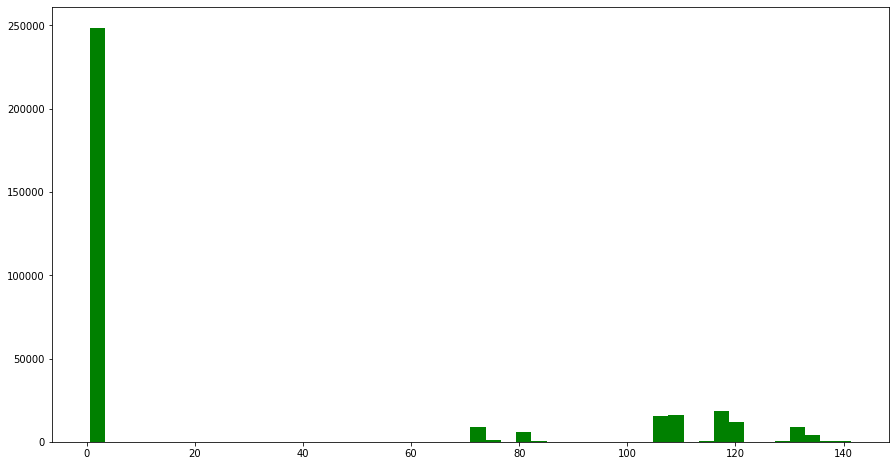

In [127]:
plt.figure(figsize=(15,8))
plt.hist(X['instrument_strike'], color="green", bins=50)
X['instrument_strike'].max()

In [132]:
X['instrument_dir'].fillna('no', inplace=True)

In [137]:
#X['volatility'].unique()
X['volatility'].fillna((X['volatility'].median()), inplace=True)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [139]:
# Get list of categorical variables
s = (X.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['instrument_type', 'instrument_underlying', 'instrument_dir', 'position_type', 'close_reason', 'currency', 'enrolled_currency', 'device', 'os_version', 'apps_flyer_device_id', 'media_source']


In [140]:
from sklearn.preprocessing import OneHotEncoder

In [141]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [142]:
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[object_cols]))

In [143]:
OH_cols.index = X.index

In [144]:
num_X = X.drop(object_cols, axis=1)

In [145]:
OH_X = pd.concat([num_X, OH_cols], axis=1)
OH_X.head()

,id_x,user_id,user_balance_id,instrument_active_id,instrument_expiration,instrument_strike,count,leverage,buy_amount,buy_amount_enrolled,...,715,716,717,718,719,720,721,722,723,724
0,10388781174,143260369,228153647,85,1567298940000000000,105.7239,0.038257,1,2000000,2000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10388781174,143260369,228153647,85,1567298940000000000,105.7239,0.038257,1,2000000,2000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,10388781174,143260369,228153647,85,1567298940000000000,105.7239,0.038257,1,2000000,2000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10388781174,143260369,228153647,85,1567298940000000000,105.7239,0.038257,1,2000000,2000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,10388781174,143260369,228153647,85,1567298940000000000,105.7239,0.038257,1,2000000,2000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
len(OH_X.index)

341942

In [151]:
Y['user_balance_type'].unique()

array([1], dtype=int64)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(OH_X, Y, test_size=0.1, random_state=RANDOM_SEED)

**Как оказалось при слиянии целевая переменная "user_balance_type" теряет свою мультиклассовость...
Тогда остается работа с new_ds_positions**

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
new_ds_positions.head()

,id,user_id,user_balance_id,instrument_type,instrument_underlying,instrument_active_id,instrument_expiration,instrument_strike,instrument_dir,position_type,...,user_balance_type,client_platform_id,open_underlying_price,margin_call,margin_call_enrolled,charge,charge_enrolled,volatility,custodial,custodial_enrolled
0,741538469,124963444,196865570,crypto,ETHUSD-L,831,2019-09-01 00:00:00+03,NaN,NaN,short,...,4,8,167204000,0,0,0,0,NaN,0,0
1,10388555637,105433234,90262176,digital-option,NZDUSD-OTC,80,2019-09-01 01:48:00+03,0.627786,call,long,...,1,8,627786,0,0,0,0,0.000011,0,0
2,10388781174,143260369,228153647,digital-option,USDJPY-OTC,85,2019-09-01 03:49:00+03,105.723900,call,long,...,1,2,105723900,0,0,0,0,0.000012,0,0
3,10388805684,143260369,228153647,digital-option,AUDCAD-OTC,86,2019-09-01 04:02:00+03,0.889982,put,long,...,1,2,889982,0,0,0,0,0.000008,0,0
4,10388812382,143260369,228153647,digital-option,AUDCAD-OTC,86,2019-09-01 04:05:00+03,0.890097,put,long,...,1,2,890097,0,0,0,0,0.000008,0,0


In [45]:
X = new_ds_positions.loc[:, new_ds_positions.columns != 'user_balance_type']
Y = new_ds_positions.loc[:, new_ds_positions.columns == 'user_balance_type']

In [46]:
cols_with_missing = [col for col in X.columns
                     if X[col].isnull().any()]

cols_with_missing

['instrument_expiration', 'instrument_strike', 'instrument_dir', 'volatility']

In [47]:
X['instrument_expiration'] = pd.to_numeric(pd.to_datetime(X['instrument_expiration']))

<ipython-input-47-d080b03a4b1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['instrument_expiration'] = pd.to_numeric(pd.to_datetime(X['instrument_expiration']))


In [48]:
X['instrument_strike'].fillna((X['instrument_strike'].median()), inplace=True)
X['instrument_dir'].fillna('no', inplace=True)
X['volatility'].fillna((X['volatility'].median()), inplace=True)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [56]:
X['create_at'] = pd.to_numeric(pd.to_datetime(X['create_at']))
X['close_at'] = pd.to_numeric(pd.to_datetime(X['close_at']))

<ipython-input-56-0d122997b6bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['create_at'] = pd.to_numeric(pd.to_datetime(X['create_at']))
<ipython-input-56-0d122997b6bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['close_at'] = pd.to_numeric(pd.to_datetime(X['close_at']))


In [57]:
# Get list of categorical variables
s = (X.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['instrument_type', 'instrument_underlying', 'instrument_dir', 'position_type', 'close_reason']


In [58]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[object_cols]))
OH_cols.index = X.index
num_X = X.drop(object_cols, axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)
OH_X.head()

,id,user_id,user_balance_id,instrument_active_id,instrument_expiration,instrument_strike,count,leverage,buy_amount,buy_amount_enrolled,...,163,164,165,166,167,168,169,170,171,172
0,741538469,124963444,196865570,831,1567285200000000000,1.107487,0.000000,50,1001943,1001943,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,10388555637,105433234,90262176,80,1567291680000000000,0.627786,0.009202,1,2000000,481090,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,10388781174,143260369,228153647,85,1567298940000000000,105.723900,0.038257,1,2000000,2000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10388805684,143260369,228153647,86,1567299720000000000,0.889982,0.019127,1,1000000,1000000,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,10388812382,143260369,228153647,86,1567299900000000000,0.890097,0.000000,1,1000000,1000000,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [59]:
Y['user_balance_type'].unique()

array([4, 1], dtype=int64)

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
RANDOM_SEED = 42
X_train, X_test, Y_train, Y_test = train_test_split(OH_X, Y, test_size=0.1, random_state=RANDOM_SEED)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [64]:
clf1 = KNeighborsClassifier()
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier()

default_classifiers = [clf1, clf2, clf3, clf4]

Fit each classifier on X_train, y_train, predict on X_test

In [66]:
clf_predictions = []
for clf in default_classifiers:
    clf.fit(X_train, Y_train)  
    pred = clf.predict(X_test)
    clf_predictions.append(pred)

<ipython-input-66-672ab0d88f9a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train, Y_train)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [69]:
accuracies = [accuracy_score(Y_test, pred) for pred in clf_predictions]
micro_precisions = [precision_score(Y_test, pred, average="micro", zero_division=1) for pred in clf_predictions] 
micro_recalls = [recall_score(Y_test, pred, average='micro', zero_division=1) for pred in clf_predictions]
macro_precisions = [precision_score(Y_test, pred, average="macro", zero_division=1) for pred in clf_predictions]
macro_recalls = [recall_score(Y_test, pred, average='macro', zero_division=1) for pred in clf_predictions]

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls]
names = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls"]

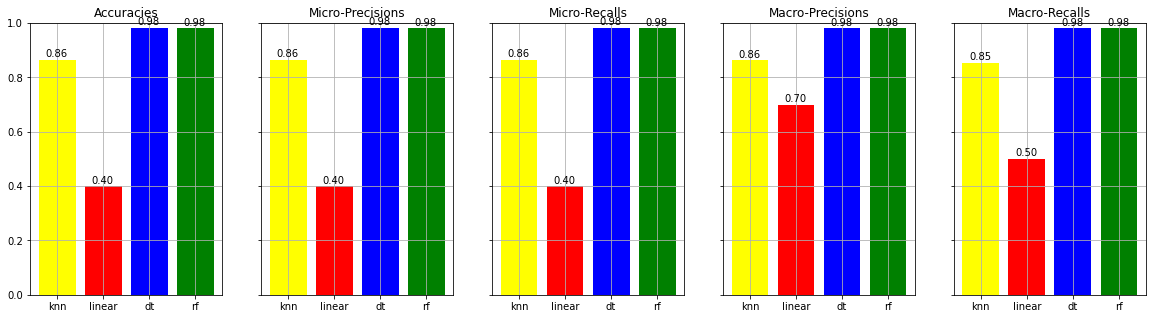

In [70]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["knn", "linear", "dt", "rf"]
colors = ["yellow", "red", "blue", "green"]
xticks = 1 + np.arange(len(xlabels))

for ax, score, name in zip(axs, scores, names):
    ax.bar(xticks, score, color=colors)
    for i, v in enumerate(score):
        ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    ax.set_title(name)
    ax.grid()

plt.show()

Grid Search

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [72]:
forest_clf = RandomForestClassifier()
forest_grid = {
    "n_estimators": np.arange(10,50)
}

In [73]:
forest_grid_searcher = GridSearchCV(forest_clf, forest_grid, cv=5, return_train_score=True)
forest_grid_searcher.fit(X_train, Y_train)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\py

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])},
             return_train_score=True)

In [74]:
res_forest = forest_grid_searcher.cv_results_

forest_means = res_forest['mean_test_score']
forest_stds = res_forest['std_test_score']

No handles with labels found to put in legend.


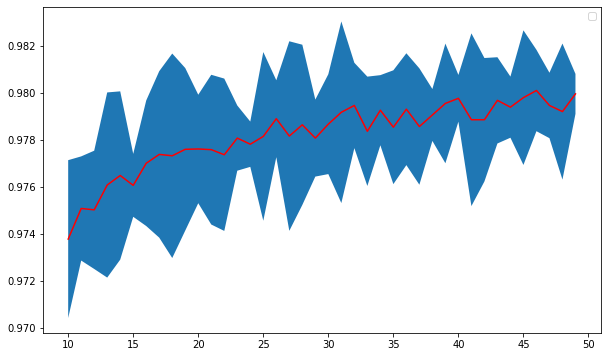

In [75]:
plt.figure(figsize=(10, 6))
xs = forest_grid_searcher.param_grid["n_estimators"]
plt.plot(xs, forest_means, color='red')
plt.fill_between(xs, forest_means + 3 * forest_stds, forest_means - 3 * forest_stds)
plt.legend()
plt.show()

In [76]:
print("Best estimator:", forest_grid_searcher.best_estimator_, "its score:", forest_grid_searcher.best_score_)

Best estimator: RandomForestClassifier(n_estimators=46) its score: 0.9800977831791794


In [77]:
forest_clf = RandomForestClassifier()
forest_grid = {
    "n_estimators": np.arange(40,100)
}

In [78]:
forest_grid_searcher = GridSearchCV(forest_clf, forest_grid, cv=5, return_train_score=True)
forest_grid_searcher.fit(X_train, Y_train)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\py

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99])},
             return_train_score=True)

In [79]:
res_forest = forest_grid_searcher.cv_results_

forest_means = res_forest['mean_test_score']
forest_stds = res_forest['std_test_score']

No handles with labels found to put in legend.


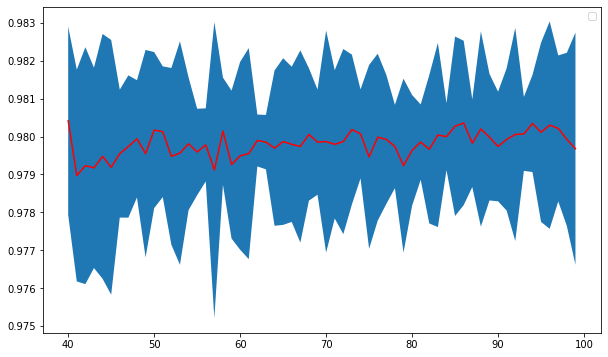

In [80]:
plt.figure(figsize=(10, 6))
xs = forest_grid_searcher.param_grid["n_estimators"]
plt.plot(xs, forest_means, color='red')
plt.fill_between(xs, forest_means + 3 * forest_stds, forest_means - 3 * forest_stds)
plt.legend()
plt.show()

In [81]:
print("Best estimator:", forest_grid_searcher.best_estimator_, "its score:", forest_grid_searcher.best_score_)

Best estimator: RandomForestClassifier(n_estimators=40) its score: 0.9804159854680986


In [84]:
forest_clf = RandomForestClassifier()
forest_grid = {
    "n_estimators": np.array([40]),
    "max_features": np.arange(1,30)
}

In [86]:
forest_grid_searcher = GridSearchCV(forest_clf, forest_grid, cv=5, return_train_score=True)
forest_grid_searcher.fit(X_train, Y_train)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\py

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'n_estimators': array([40])},
             return_train_score=True)

In [87]:
print("Best estimator:", forest_grid_searcher.best_estimator_, "its score:", forest_grid_searcher.best_score_)

Best estimator: RandomForestClassifier(max_features=29, n_estimators=40) its score: 0.9842344254874467


In [88]:
model = RandomForestClassifier(max_features=29, n_estimators=40)
model.fit(X_train, Y_train)

<ipython-input-88-74cbbebd621d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


RandomForestClassifier(max_features=29, n_estimators=40)

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
print(np.mean(cross_val_score(model, X_test, Y_test, cv=5, scoring='roc_auc', n_jobs=-1)))
print(np.mean(cross_val_score(model, X_train, Y_train, cv=5, scoring='roc_auc', n_jobs=-1)))

0.9910164015741353
0.9986639561624331
